In [184]:
#import modules
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier
import pickle

In [103]:
#read dataset susing pandas
url=r'C:\Users\goura\Downloads\DSData-master (1)\DSData-master\winequality-red.csv'
df = pd.read_csv(url)

In [105]:
#show staring 5 data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#show last 5 data
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [9]:
#information about dataset
print('information about dataset\n')
df.info()

information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
#information about dataset
print('describe about dataset')
df.describe()

describe about dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data Visualization

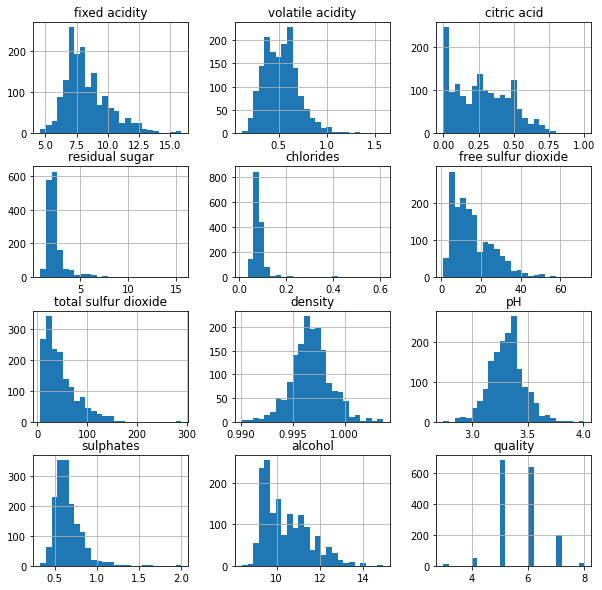

In [13]:
# we use visualization for explaining the data

df.hist(bins=25,figsize=(10,10))
plt.show()

In [14]:
#The above graph reveals that how that data is easily distributed on features.

# plot the bar graph in which we check what value of alcohol can able to make changes in quality.

Text(0, 0.5, 'Alcohol')

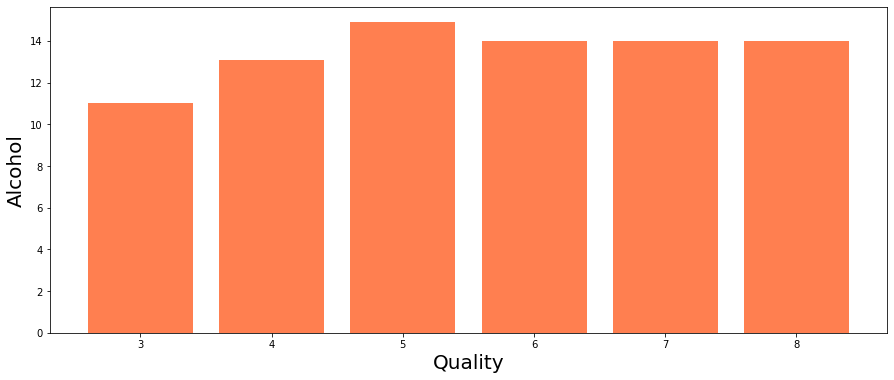

In [21]:
plt.figure(figsize=[15,6])
# plot bar graph
plt.bar(df['quality'],df['alcohol'],color='#FF7F50')
# label x-axis
plt.xlabel('Quality',fontsize=20)
#label y-axis
plt.ylabel('Alcohol',fontsize=20)

# Correlation:-
    For checking correlation we use a statistical method that finds the bonding and relationship between two features.

#################
#    Heatmap    #
#################


<AxesSubplot:>

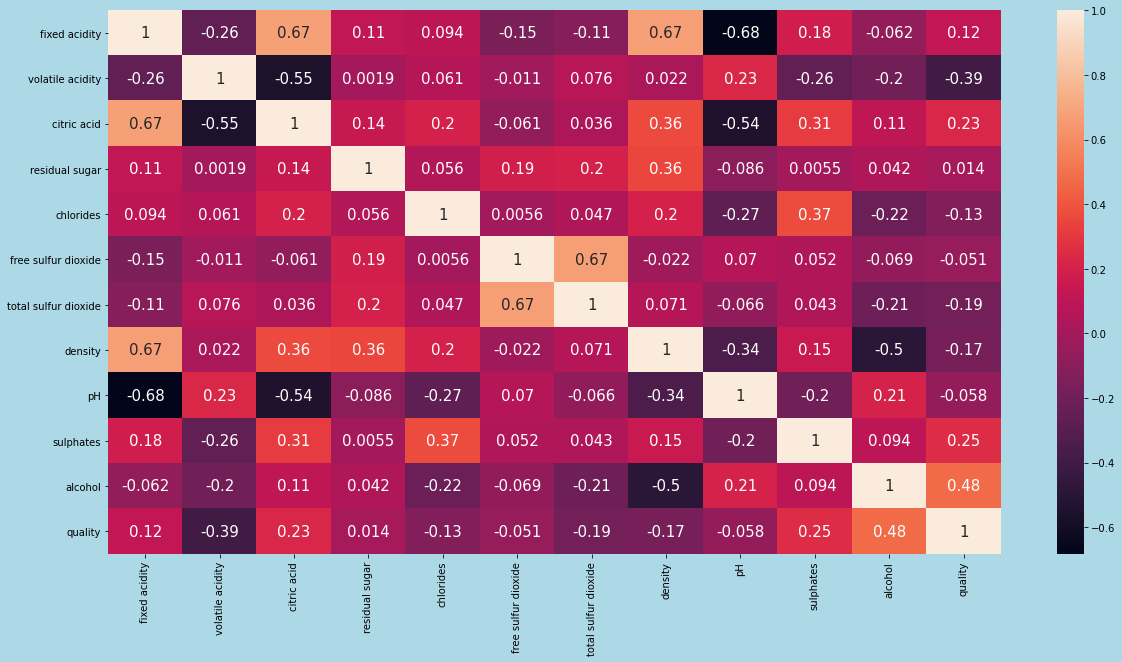

In [30]:
# ploting heatmap
print('''#################
#    Heatmap    #
#################''')
plt.figure(figsize=[20,10],facecolor='#ADD8E6')
sb.heatmap(df.corr(),annot=True,annot_kws={"size": 15})

# we have to find those features that are fully correlated to each other by this we reduce the number of features from the data.

In [33]:
#we find those features whose correlation number is high

for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

In [38]:
#we drop that feature

new_df=df.drop('total sulfur dioxide',axis=1)
#print(starti 5 rows)
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5


# Handle null values in data sets

In [40]:
#check all null values in data set
new_df.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

In [41]:
# 0 null values in this datasets 

In [51]:
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5


# Splitting dataset
    we perform a split operation on our dataset:

In [124]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
x = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [113]:
# print proportion of good vs bad wines

print('''############################
#    good vs bad wines     #
############################\n''')
df['goodquality'].value_counts()

############################
#    good vs bad wines     #
############################



0    1382
1     217
Name: goodquality, dtype: int64

In [129]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

# Splitting dataset

In [151]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

# Normalization

In [153]:

#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(X_train)
new_Xtrain = norm_fit.transform(X_train)
new_Xtest = norm_fit.transform(X_test)

# display values
print(f'new xtest = {new_Xtrain}')
 

new xtest = [[0.33035714 0.42808219 0.11       ... 0.35433071 0.27607362 0.18461538]
 [0.25892857 0.21232877 0.29       ... 0.51968504 0.16564417 0.16923077]
 [0.33035714 0.30136986 0.04       ... 0.37795276 0.04294479 0.18461538]
 ...
 [0.28571429 0.30821918 0.31       ... 0.43307087 0.19631902 0.16923077]
 [0.74107143 0.23972603 0.49       ... 0.44094488 0.19018405 0.66153846]
 [0.45535714 0.5890411  0.32       ... 0.4015748  0.06748466 0.15384615]]


# Applying Model
    I wanted to compare 3 different machine learning models: decision trees, random forests and AdaBoost.For the purpose of this project, I wanted to compare these models by their accuracy.


# M1=Decision Tree
    Decision trees are a popular model, used in operations research, strategic planning, and machine learning

In [167]:

m1 = DecisionTreeClassifier(random_state=1)
#fit model usint X_train and y_train
m1.fit(new_Xtrain, y_train)
#y predict usint x_tex
y_pred1 = m1.predict(new_Xtest)

# check model score
DT_score = m1.score(new_Xtest,y_test)

#check mean sqare error
DT_mse = mean_squared_error(y_pred1,y_test)
#root mean squared error
DT_rmse = np.sqrt(DT_mse)


#print score of model , mean suared error , root mean square score and classification report
print(f'score of model is : {DT_score}')#print model score
print('mean squared error is : ',DT_mse)#print mean squared error
print(f'root mean squared error is : {DT_rmse}\n')#print root mean squared error
print(classification_report(y_test, y_pred1))

score of model is : 0.9025
mean squared error is :  0.0975
root mean squared error is : 0.3122498999199199

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       355
           1       0.55      0.71      0.62        45

    accuracy                           0.90       400
   macro avg       0.76      0.82      0.78       400
weighted avg       0.92      0.90      0.91       400



# M2=Random Forest

In [181]:

m2 = RandomForestClassifier(random_state=1)
#fit model using strain and y train
m2.fit(new_Xtrain, y_train)

#y predict usint x_tex
y_pred2 = m2.predict(new_Xtest)

# check model score
RF_score = m2.score(new_Xtest,y_test)

#check mean sqare error
RF_mse = mean_squared_error(y_pred2,y_test)
#root mean squared error
RF_rmse = np.sqrt(RF_mse)

#print score of model , mean suared error , root mean square score and classification report
print(f'score of model is : {RF_score}')#print model score
print('mean squared error is : ',RF_mse)#print mean squared error
print(f'root mean squared error is : {RF_rmse}\n')#print root mean squared error
print(classification_report(y_test, y_pred2))

score of model is : 0.9225
mean squared error is :  0.0775
root mean squared error is : 0.2783882181415011

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.68      0.58      0.63        45

    accuracy                           0.92       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.92      0.92      0.92       400



# M3=AdaBoost

In [182]:
m3 = AdaBoostClassifier(random_state=1)
#fit model
m3.fit(new_Xtrain, y_train)
#predict value
y_pred3 = m3.predict(new_Xtest)

# check model score
AB_score = m3.score(new_Xtest,y_test)

#check mean sqare error
AB_mse = mean_squared_error(y_pred2,y_test)
#root mean squared error
AB_rmse = np.sqrt(AB_mse)

#print score of model , mean suared error , root mean square score and classification report
print(f'score of model is : {AB_score}')#print model score
print('mean squared error is : ',AB_mse)#print mean squared error
print(f'root mean squared error is : {AB_rmse}\n')#print root mean squared error
print(classification_report(y_test, y_pred3))

score of model is : 0.89
mean squared error is :  0.0775
root mean squared error is : 0.2783882181415011

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.51      0.49      0.50        45

    accuracy                           0.89       400
   macro avg       0.72      0.71      0.72       400
weighted avg       0.89      0.89      0.89       400



# Saving Model

In [193]:
save all model

#save model Decision Tree
file = 'wine_quality'
#save file
save = pickle.dump(m1,open(file,'wb'))

#save model Random Forest
file = 'wine_quality'
#save file
save = pickle.dump(m2,open(file,'wb'))

#save model AdaBoost
file = 'wine_quality'
#save file
save = pickle.dump(m3,open(file,'wb'))

# via Random Forest

<AxesSubplot:>

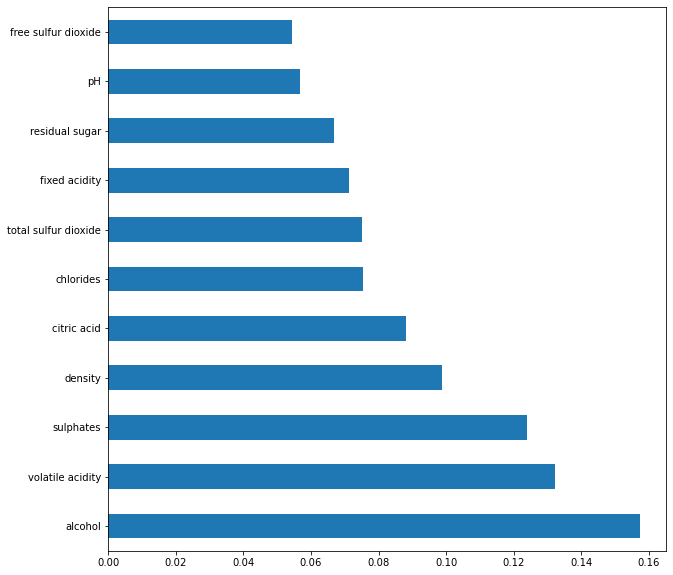

In [195]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

# Comparing the Top 4 Features

In [199]:
# Filtering df for only good quality
df_temp = df[df['goodquality']==1]
print('''######################
#    goodquality     #
######################''')
df_temp.describe()

######################
#    goodquality     #
######################


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.276443,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,7.000000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,7.000000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,7.000000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,7.000000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000,1.0


In [200]:
# Filtering df for only bad quality
df_temp2 = df[df['goodquality']==0]
print('''######################
#     badquality     #
######################''')
df_temp2.describe()

######################
#     badquality     #
######################


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,5.408828,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.601719,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,5.000000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,5.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,6.000000,0.0
